In [1]:
import plotastic as plst
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example Analysis: Diamonds

**Raw Data:** https://github.com/mwaskom/seaborn-data
  
**Original Source:** https://ggplot2.tidyverse.org/reference/diamonds.html

In [2]:
# https://ggplot2.tidyverse.org/reference/diamonds.html
DF = sns.load_dataset("diamonds")
DF

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
DF = sns.load_dataset("diamonds")
DF = DF[DF["cut"] != "Ideal"]  # Just use that
dims = dict(
    y="price",
    x="clarity",
    hue="color",
    # col="cut",
)
DA6 = plst.DataAnalysis(DF, dims, verbose=False)

In [4]:
# DA6.transform_y("log10", inplace=True)  # Log transform
norm = DA6.check_normality()  # -> Only few groups are not normal -> parametric
### Get percentage of rows where normality is true
len(norm[norm["normal"] == True]) / len(norm)

/Users/martinkuric/_REPOS/plotastic/src/plotastic/dimensions/dataframetool.py:892: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, df in self.data.groupby(self.factors_all_without_x):


0.0

In [10]:
DA6.omnibus_kruskal()

/Users/martinkuric/_REPOS/plotastic/src/plotastic/dimensions/dataframetool.py:892: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, df in self.data.groupby(self.factors_all_without_x):


,,Source,ddof1,H,p-unc,stars
color,,,,,,
D,Kruskal,clarity,7,139.360355,6.920141e-27,****
E,Kruskal,clarity,7,399.721639,2.736724e-82,****
F,Kruskal,clarity,7,180.418462,1.589453e-35,****
G,Kruskal,clarity,7,210.269748,7.649726e-42,****
H,Kruskal,clarity,7,531.343722,1.457321e-110,****
I,Kruskal,clarity,7,308.289351,1.025930e-62,****
J,Kruskal,clarity,7,44.597671,1.636879e-07,****


In [11]:
DA6.test_pairwise(paired=False, parametric=False)

clarity     A     B      mean(A)       std(A)  \
    color Contrast                                                        
NaN -     clarity               -   SI1   VS1  4114.902084  3823.012494   
          clarity               -   SI1   VS2  4114.902084  3823.012494   
          clarity               -   SI1   SI2  4114.902084  3823.012494   
          clarity               -   SI1  VVS2  4114.902084  3823.012494   
          clarity               -   SI1  VVS1  4114.902084  3823.012494   
...                           ...   ...   ...          ...          ...   
    D     color * clarity     NaN  VVS2    I1  3068.304833  3778.636888   
          color * clarity     NaN  VVS2    IF  3068.304833  3778.636888   
          color * clarity     NaN  VVS1    I1  3270.759259  4269.380340   
          color * clarity     NaN  VVS1    IF  3270.759259  4269.380340   
          color * clarity     NaN    I1    IF  4013.689655  2717.750345   

                               mean(B)       std(B) Paired  Parametric  \
    color Contrast                                                       
NaN -     clarity          4113.377783  4132.749160  False       False   
          clarity          4376.870043  4186.075148  False       False   
          clarity          5183.978169  4257.866219  False       False   
          clarity          3319.169106  3837.867064  False       False   
          clarity          2593.111318  3450.987019  False       False   
...                                ...          ...    ...         ...   
    D     color * clarity  4013.689655  2717.750345  False       False   
          color * clarity  9390.155556  6889.321345  False       False   
          color * clarity  4013.689655  2717.750345  False       False   
          color * clarity  9390.155556  6889.321345  False       False   
          color * clarity  9390.155556  6889.321345  False       False   

                                U-val alternative          p-unc    hedges  \
    color Contrast                                                           
NaN -     clarity          21033472.5   two-sided   1.663790e-05  0.000388   
          clarity          30997278.0   two-sided   5.149438e-02 -0.065645   
          clarity          24267591.0   two-sided   1.246201e-66 -0.266238   
          clarity          13126961.0   two-sided   5.793609e-60  0.207952   
          clarity           9488198.0   two-sided  1.020623e-106  0.403857   
...                               ...         ...            ...       ...   
    D     color * clarity      2179.5   two-sided   9.518622e-05 -0.255458   
          color * clarity      2126.0   two-sided   3.286396e-12 -1.448445   
          color * clarity       922.0   two-sided   6.969848e-04 -0.184820   
          color * clarity       951.0   two-sided   3.214052e-09 -1.177360   
          color * clarity       431.0   two-sided   1.439998e-02 -0.942306   

                          **p-unc    Sign.                 pairs cross  
    color Contrast                                                      
NaN -     clarity            ****  signif.            (SI1, VS1)     x  
          clarity           0.051   toler.            (SI1, VS2)     x  
          clarity            ****  signif.            (SI1, SI2)     x  
          clarity            ****  signif.           (SI1, VVS2)     x  
          clarity            ****  signif.           (SI1, VVS1)     x  
...                           ...      ...                   ...   ...  
    D     color * clarity    ****  signif.  ((I1, D), (VVS2, D))     x  
          color * clarity    ****  signif.  ((IF, D), (VVS2, D))     x  
          color * clarity     ***  signif.  ((I1, D), (VVS1, D))     x  
          color * clarity    ****  signif.  ((IF, D), (VVS1, D))     x  
          color * clarity       *  signif.    ((IF, D), (I1, D))     x  

[413 rows x 17 columns]

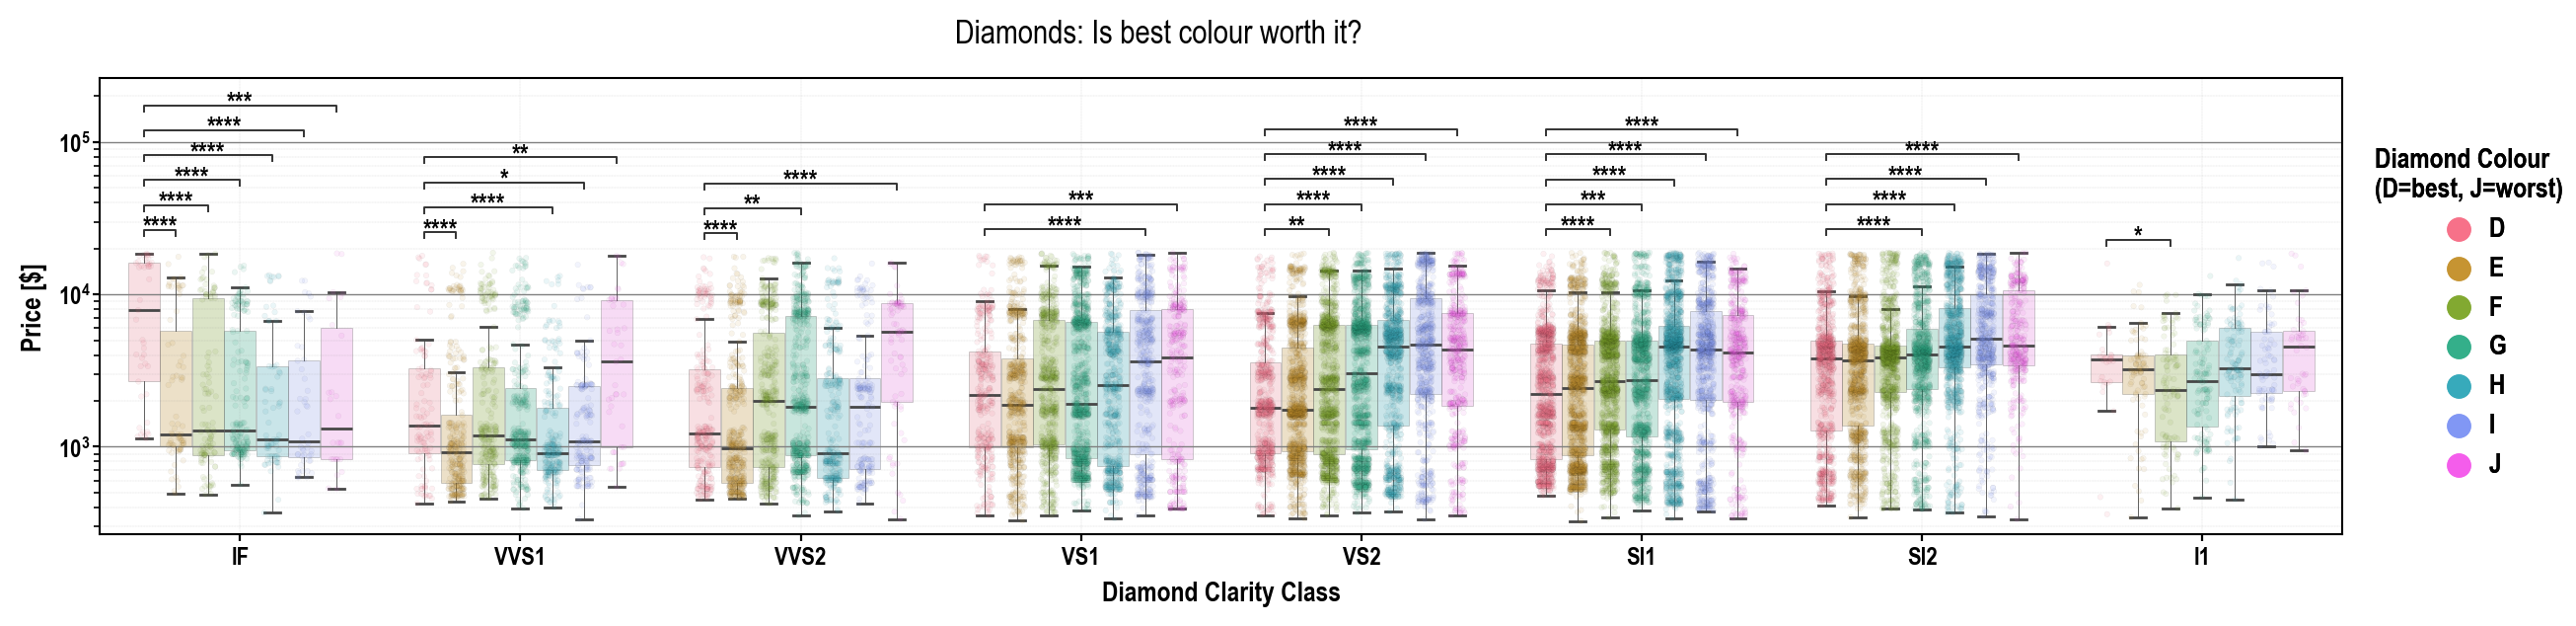

In [6]:
plst.set_style("paper")
plst.set_palette("hls", verbose=False)
(
    DA6.plot_box_strip(
        subplot_kws=dict(
            figsize=(12, 3),
        ),
        strip_kws=dict(
            dodge=True,
            size=2,
            alpha=0.1,
            linewidth=0.1,
            edgecolor="black",
        ),
        legend_kws=dict(title="Diamond Colour\n(D=best, J=worst)"),
    )
    .edit_y_scale_log(10)
    .annotate_pairwise(
        include=["D"],  # Show p-values only with "D"
        exclude="__X",  # Don't show p-values spanning different clarities
    )
    .edit_grid()
    .edit_legend(title="Diamond Colour\n(D=best, J=worst)")
    .edit_xy_axis_labels(y="Price [$]", x="Diamond Clarity Class")
)

plt.suptitle("Diamonds: Is best colour worth it?")
plt.savefig("diamonds1.png", dpi=300, bbox_inches="tight")

In [7]:
# Best Clarity IF shows different pattern compared to VS2
DF = sns.load_dataset("diamonds")
DF = DF[DF["clarity"].isin(["IF", "VS2"])]
DF = DF[DF["cut"] != "Fair"]  # has empty groups
DF["clarity"] = DF["clarity"].astype("category")
DF["clarity"] = DF["clarity"].cat.remove_unused_categories()
###
DF["cut"] = DF["cut"].astype("category")
DF["cut"] = DF["cut"].cat.remove_unused_categories()
DF

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
21,0.23,Very Good,E,VS2,63.8,55.0,352,3.85,3.92,2.48
27,0.30,Very Good,J,VS2,62.2,57.0,357,4.28,4.30,2.67
28,0.23,Very Good,D,VS2,60.5,61.0,357,3.96,3.97,2.40
38,0.26,Very Good,D,VS2,60.8,59.0,403,4.13,4.16,2.52
...,...,...,...,...,...,...,...,...,...,...
53921,0.70,Very Good,E,VS2,62.8,60.0,2755,5.59,5.65,3.53
53923,0.73,Ideal,I,VS2,61.3,56.0,2756,5.80,5.84,3.57
53924,0.73,Ideal,I,VS2,61.6,55.0,2756,5.82,5.84,3.59
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


In [8]:
dims = dict(
    y="price",
    x="clarity",
    hue="color",
    col="cut",
)
DA7 = plst.DataAnalysis(DF, dims, verbose=False)
DA7.test_pairwise(paired=False, parametric=False)

clarity    A   B      mean(A)       std(A)  \
cut   color Contrast                                                     
Ideal -     clarity               -  VS2  IF  3284.550385  3737.242431   
            color                 -    G   F  3572.657388  3975.573261   
            color                 -    G   E  3572.657388  3975.573261   
            color                 -    G   H  3572.657388  3975.573261   
            color                 -    G   I  3572.657388  3975.573261   
...                             ...  ...  ..          ...          ...   
Good  I     color * clarity     NaN  VS2  IF  5956.563636  5117.876399   
      G     color * clarity     NaN  VS2  IF  4140.713542  3335.507178   
      F     color * clarity     NaN  VS2  IF  3790.543478  3222.350703   
      J     color * clarity     NaN  VS2  IF  4803.166667  3649.595450   
      H     color * clarity     NaN  VS2  IF  4433.043478  4220.399993   

                                 mean(B)       std(B) Paired  Parametric  \
cut   color Contrast                                                       
Ideal -     clarity          2272.913366  3320.846698  False       False   
            color            3045.350480  3811.383586  False       False   
            color            2234.561317  2798.819941  False       False   
            color            3444.832481  3807.644891  False       False   
            color            4100.020638  4355.094346  False       False   
...                                  ...          ...    ...         ...   
Good  I     color * clarity  1749.333333  1517.738932  False       False   
      G     color * clarity  4060.136364  4759.094525  False       False   
      F     color * clarity  3132.866667  3485.379686  False       False   
      J     color * clarity  2738.000000  2455.452952  False       False   
      H     color * clarity  5948.750000  5377.174684  False       False   

                                 U-val alternative         p-unc    hedges  \
cut   color Contrast                                                         
Ideal -     clarity          3497076.0   two-sided  7.739681e-14  0.276322   
            color             866623.5   two-sided  6.306871e-04  0.135080   
            color             948063.5   two-sided  4.848074e-07  0.384519   
            color             575745.5   two-sided  4.774206e-02  0.032628   
            color             364321.5   two-sided  4.097992e-01 -0.129092   
...                                ...         ...           ...       ...   
Good  I     color * clarity      527.0   two-sided  1.430173e-02  0.833486   
      G     color * clarity     2339.0   two-sided  4.103055e-01  0.022925   
      F     color * clarity     1613.0   two-sided  2.783318e-01  0.202104   
      J     color * clarity      357.0   two-sided  1.904392e-01  0.569689   
      H     color * clarity      207.0   two-sided  3.983003e-01 -0.354849   

                            **p-unc    Sign.                pairs cross  
cut   color Contrast                                                     
Ideal -     clarity            ****  signif.            (VS2, IF)     x  
            color               ***  signif.               (G, F)     x  
            color              ****  signif.               (G, E)     x  
            color                 *  signif.               (G, H)     x  
            color                ns    False               (G, I)     x  
...                             ...      ...                  ...   ...  
Good  I     color * clarity       *  signif.  ((IF, I), (VS2, I))     x  
      G     color * clarity      ns    False  ((IF, G), (VS2, G))     x  
      F     color * clarity      ns    False  ((IF, F), (VS2, F))     x  
      J     color * clarity      ns    False  ((IF, J), (VS2, J))     x  
      H     color * clarity      ns    False  ((IF, H), (VS2, H))     x  

[284 rows x 17 columns]

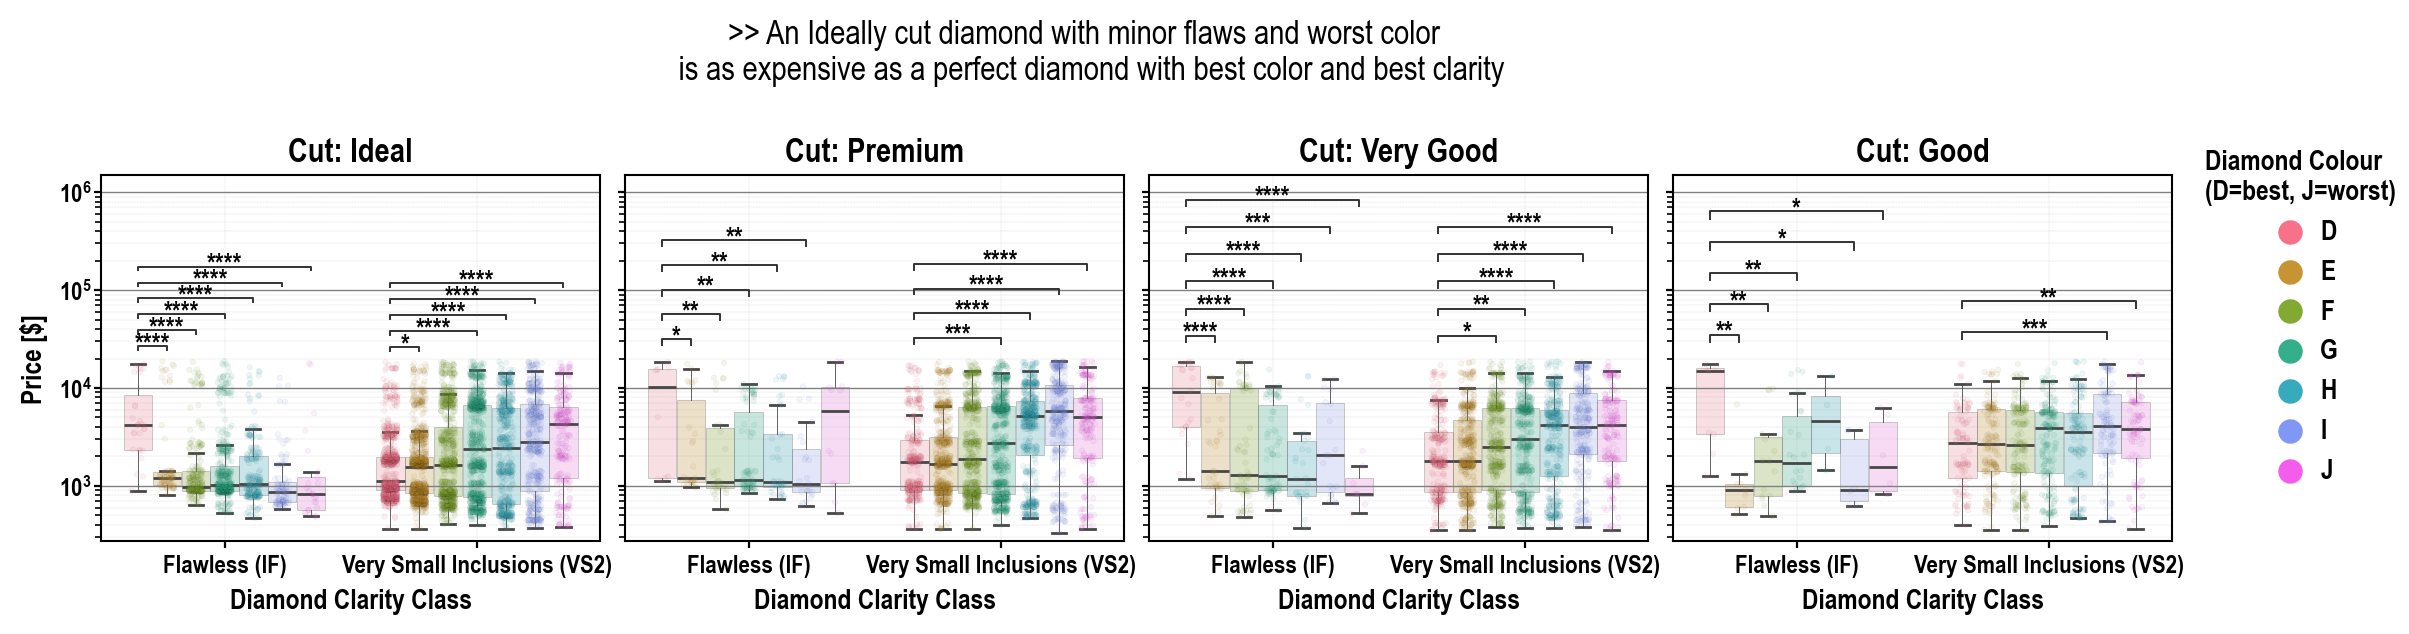

In [9]:
plst.set_style("paper")
plst.set_palette("hls", verbose=False)
(
    DA7.plot_box_strip(
        subplot_kws=dict(
            figsize=(12, 3),
        ),
        strip_kws=dict(
            dodge=True,
            size=2,
            alpha=0.1,
            linewidth=0.1,
            edgecolor="black",
        ),
        legend_kws=dict(title="Diamond Colour\n(D=best, J=worst)"),
    )
    .edit_y_scale_log(10)
    .annotate_pairwise(
        include=["D"],  # Show p-values only with "D"
        exclude="__X",  # Don't show p-values spanning different clarities
    )
    .edit_grid()
    .edit_xy_axis_labels(
        y="Price [$]",
        x="Diamond Clarity Class",
    )
    .edit_x_ticklabels_exchange(
        ["Flawless (IF)", "Very Small Inclusions (VS2)"]
    )
    .edit_titles_with_func(
        lambda x: "Cut: " + x,
    )
)
plt.subplots_adjust(top=0.72)
plt.suptitle(
    ">> An Ideally cut diamond with minor flaws and worst color \n is as expensive as a perfect diamond with best color and best clarity"
)
plt.savefig("diamonds2.png", dpi=300, bbox_inches="tight")